In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, SimpleRNN, LSTM
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('goog.csv')

In [5]:
data.head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


In [6]:
data = data[['Open']].values

In [7]:
scaler = MinMaxScaler()

In [8]:
data_scale = scaler.fit_transform(data)

In [9]:
x= []
y=[]
time_steps = 60

In [10]:
for i in range(time_steps, len(data_scale)):
    x.append(data_scale[i-time_steps:i, 0])
    y.append(data_scale[i, 0])

In [11]:
x, y = np.array(x), np.array(y)

In [12]:
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

In [36]:
model = Sequential([
    Input(shape=( x.shape[1], 1)),
    LSTM(units=50, activation='tanh', return_sequences=True),
    LSTM(units=50),
    Dense(1)
])

In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

In [40]:
history = model.fit(x, y , epochs=50, batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.9616
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.7712
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.6022
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 0.4476
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.3043
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.1746
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.0686
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.0062
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.0160
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0853
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.1196
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.1000
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0592


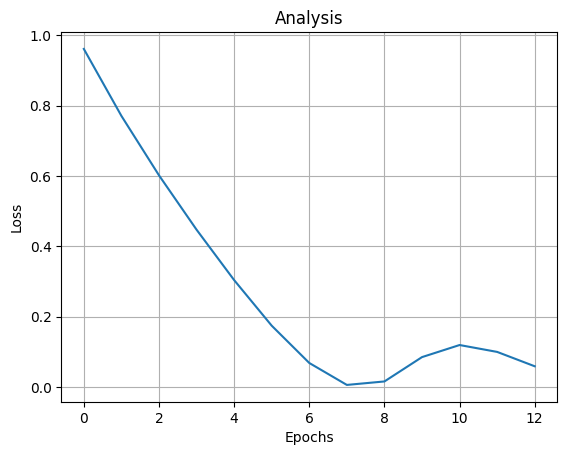

In [41]:
plt.plot(history.history['loss'], label='Loss')
plt.title("Analysis")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [42]:
test = pd.read_csv('goog.csv')
test = test[['Open']].values

In [43]:
tot_data = np.concatenate((data[-60:], test), axis=0)
tot_data_scale = scaler.transform(tot_data)

In [44]:
X_test = []
for i in range(60, len(tot_data)):
    X_test.append(tot_data[i-60:i, 0])
X_test = np.array(X_test).reshape(-1, 60, 1)

In [45]:
pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 309ms/step


In [46]:
pred_scale = scaler.inverse_transform(pred)

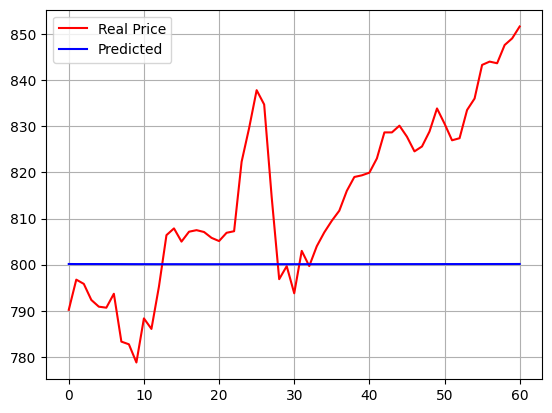

In [49]:
plt.plot(test, color='red', label='Real Price')
plt.plot(pred_scale, color='blue', label='Predicted')
plt.legend()
plt.grid(True)
plt.show()